In [30]:
import pandas as pd
import numpy as np

In [31]:
ls

Decision Trees.ipynb              only_non_motor_2.csv
Decision Trees_two_classes.ipynb  only_non_motor_two_classes.csv
combined_with_two_classes.csv     only_self_report_2.csv
new_merge_2.csv                   only_self_report_two_classes.csv
only_motor_2.csv                  temp_schema.csv
only_motor_two_classes.csv


In [32]:
raw_df = pd.read_csv('new_merge_2.csv')

In [33]:
raw_df

,NHY,CLASS,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP1SLPN,NP1SLPD,...,STAIAD31,STAIAD32,STAIAD33,STAIAD34,STAIAD35,STAIAD36,STAIAD37,STAIAD38,STAIAD39,STAIAD40
0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,2.0,2.0,4.0,1.0,2.0,3.0,2.0,2.0,4.0,2.0
1,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,2.0,2.0,4.0,3.0,2.0,4.0,1.0,2.0,4.0,1.0
2,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,4.0,1.0
3,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,4.0,1.0
4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,2.0,2.0,3.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,4.0,4.0,4.0,1.0,4.0,1.0,1.0,4.0,1.0
10010,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,1.0
10011,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,1.0,1.0,4.0,4.0,1.0,4.0,1.0,1.0,4.0,1.0
10012,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier(random_state=3, max_depth=4)

In [36]:
from sklearn.model_selection import StratifiedKFold

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [38]:
cv = StratifiedKFold(n_splits=5)

In [39]:
X, Y = raw_df.iloc[:, 2:], raw_df.iloc[:, 1]

In [40]:
X.shape

(10014, 221)

In [41]:
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_classification_reports = []
fold_importances = []

In [42]:
for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='macro')
    recall = recall_score(Y_test, Y_pred, average='macro')
    report = classification_report(Y_test, Y_pred)

    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_classification_reports.append(report)

    fold_importance = model.feature_importances_
    fold_importances.append(fold_importance)

    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

fold: 1
Accuracy for fold 1: 0.8947
Recall for fold 1: 0.8373
Precision for fold 1: 0.8627
-----
fold: 2
Accuracy for fold 2: 0.9331
Recall for fold 2: 0.8059
Precision for fold 2: 0.9297
-----
fold: 3
Accuracy for fold 3: 0.9056
Recall for fold 3: 0.7774
Precision for fold 3: 0.8901
-----
fold: 4
Accuracy for fold 4: 0.8557
Recall for fold 4: 0.7444
Precision for fold 4: 0.8083
-----
fold: 5
Accuracy for fold 5: 0.8591
Recall for fold 5: 0.7546
Precision for fold 5: 0.8565
-----


In [43]:
fold_accuracies = np.array(fold_accuracies)
fold_precisions = np.array(fold_precisions)
fold_recalls = np.array(fold_recalls)
fold_importances = np.array(fold_importances)

In [44]:
print("Non-weighted:")
print(f"{fold_accuracies.mean():.4f}")
print(f"{fold_precisions.mean():.4f}")
print(f"{fold_recalls.mean():.4f}")

Non-weighted:
0.8897
0.8694
0.7839


In [45]:
importances = fold_importances.mean(axis=0)

In [46]:
importances_df = pd.DataFrame({
    'features': X.columns.tolist(),
    'importances': importances
})

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
'CLASS' in X.columns.tolist()

False

<Axes: xlabel='importances', ylabel='features'>

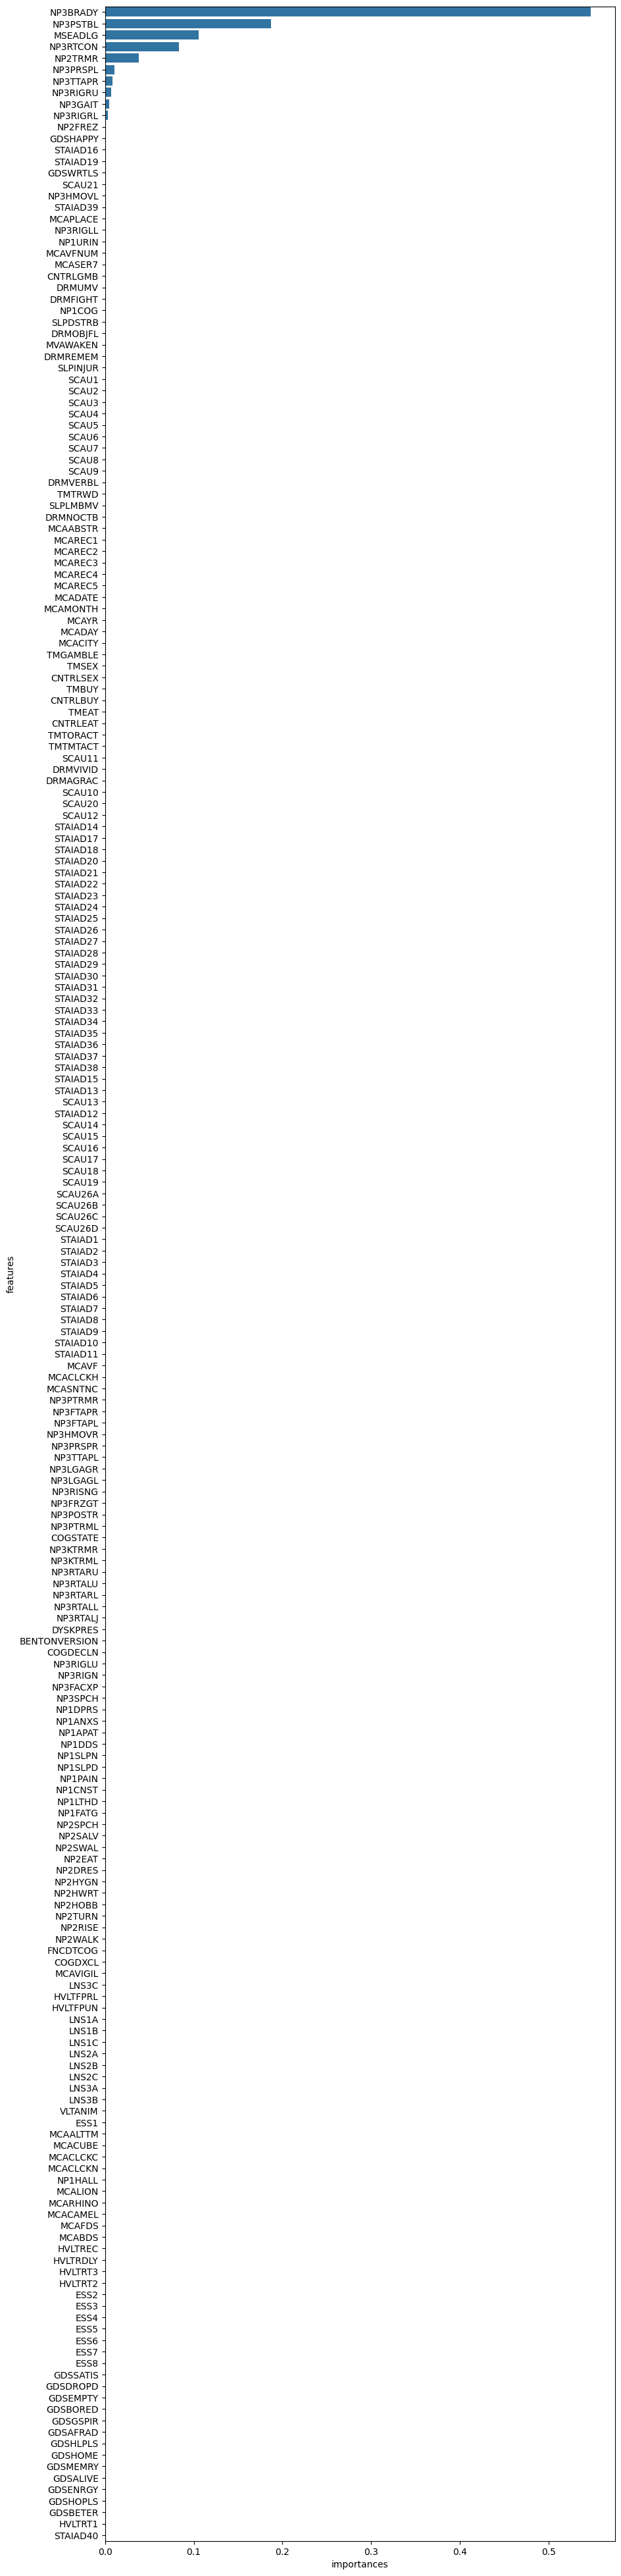

In [49]:
plt.figure(figsize = (10, 50))
sns.barplot(importances_df.sort_values('importances', ascending=False), x = 'importances', y = 'features')

In [50]:
top_20 = importances_df.sort_values('importances', ascending=False).head(20)

In [51]:
top_20

,features,importances
48,NP3BRADY,0.547247
46,NP3PSTBL,0.187333
60,MSEADLG,0.105551
58,NP3RTCON,0.083073
22,NP2TRMR,0.037704
38,NP3PRSPL,0.010291
39,NP3TTAPR,0.008736
29,NP3RIGRU,0.006614
44,NP3GAIT,0.004985
31,NP3RIGRL,0.003161


In [52]:
train_df, test_df = train_test_split(raw_df, test_size=0.3, random_state = 0)

NameError: name 'train_test_split' is not defined

In [ ]:
X_train = train_df.iloc[:, 2:]

In [ ]:
Y_train = train_df.iloc[:, 1]

In [ ]:
X_test = test_df.iloc[:, 2:]

In [ ]:
Y_test = test_df.iloc[:, 1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

In [ ]:
accuracy_score(Y_train, Y_train_pred)

In [ ]:
Y_pred = model.predict(X_test)

In [53]:
accuracy_score(Y_test, Y_pred)

0.8591408591408591

In [54]:
precision_score(Y_test, Y_pred, average='macro')

0.8564921373657386

In [55]:
recall_score(Y_test, Y_pred, average='macro')

0.7545635155738136

In [56]:
report = classification_report(Y_test, Y_pred)

In [57]:
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       559
         1.0       0.89      0.90      0.89      1327
         2.0       0.90      0.53      0.66       116

    accuracy                           0.86      2002
   macro avg       0.86      0.75      0.79      2002
weighted avg       0.86      0.86      0.86      2002



In [58]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})

In [67]:
s_df = pd.read_csv('temp_schema.csv')

In [68]:
def make_type_list(s_df, weights_df):
    #s_df refers to schema_df
    #weights_df could also be importances_df
    type_list = []

    s_df.set_index('ITM_NAME', inplace=True)
    top_20 = weights_df.sort_values('importances', ascending=False).head(20)
    for i in top_20['features'].tolist():
        type_list.append(s_df.loc[i]['TYPE'])
    print('Success')
    return type_list

def merge_type_list(test_list, weight_df):
    type_list = pd.Series(test_list)
    type_list_df = type_list.to_frame(name='type')
    # type_list_df.reset_index(drop=True, inplace=True)
    top_20 = weight_df.sort_values('importances', ascending=False).head(20)
    top_20.reset_index(drop=True, inplace=True)
    result_df = pd.concat([type_list_df, top_20], axis=1)
    return result_df

In [69]:
test_list = make_type_list(s_df, importances_df)

Success


In [70]:
result = merge_type_list(test_list, importances_df)

In [71]:
result

,type,features,importances
0,Motor,NP3BRADY,0.547247
1,Motor,NP3PSTBL,0.187333
2,Motor,MSEADLG,0.105551
3,Motor,NP3RTCON,0.083073
4,Self Report,NP2TRMR,0.037704
5,Motor,NP3PRSPL,0.010291
6,Motor,NP3TTAPR,0.008736
7,Motor,NP3RIGRU,0.006614
8,Motor,NP3GAIT,0.004985
9,Motor,NP3RIGRL,0.003161


In [ ]:
result.to_csv('')

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='importance', ylabel='feature'>

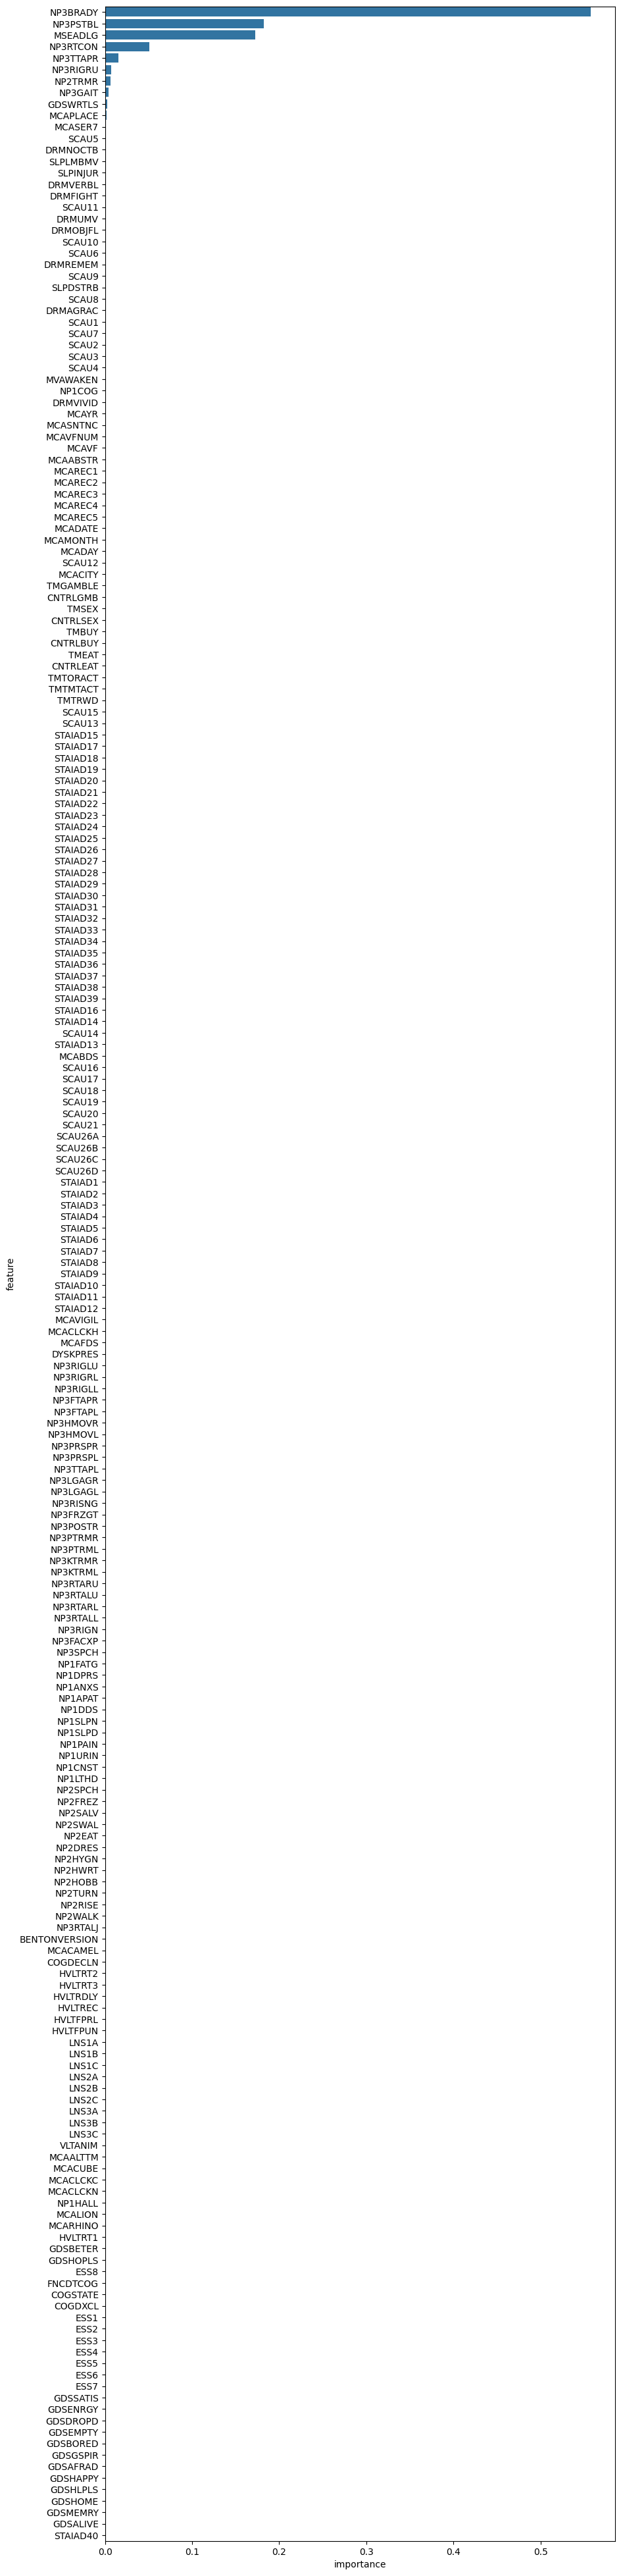

In [60]:
plt.figure(figsize=(10,50))
sns.barplot(data=importance_df.sort_values('importance', ascending=False), x='importance', y='feature')

In [61]:
def dt_model(md):
    model_DT = DecisionTreeClassifier(max_depth=md, random_state=0)
    model_DT.fit(X_train, Y_train)
    Y_pred = model_DT.predict(X_test)
    accuracy = accuracy_score(Y_pred, Y_test)
    precision = precision_score(Y_test, Y_pred, average='macro')
    recall = recall_score(Y_test, Y_pred, average='macro')

    return {'max_depth': md, 'accuracy': accuracy, 'precision': precision, 'recall': recall}

In [62]:
model.get_depth()

4

In [63]:
report_df = pd.DataFrame([dt_model(md) for md in range(2, 21)])

In [64]:
report_df

,max_depth,accuracy,precision,recall
0,2,0.809191,0.783163,0.774853
1,3,0.864635,0.827477,0.796869
2,4,0.859141,0.856492,0.754564
3,5,0.866134,0.847629,0.776850
4,6,0.866633,0.851302,0.788006
5,7,0.872128,0.840160,0.804365
6,8,0.864136,0.822503,0.807868
7,9,0.856643,0.811322,0.781740
8,10,0.850150,0.801994,0.782823
9,11,0.851149,0.803297,0.792089


In [65]:
top_20 = importance_df.sort_values('importance', ascending=False).head(25)['feature'].tolist()

In [66]:
top_20

['NP3BRADY',
 'NP3PSTBL',
 'MSEADLG',
 'NP3RTCON',
 'NP3TTAPR',
 'NP3RIGRU',
 'NP2TRMR',
 'NP3GAIT',
 'GDSWRTLS',
 'MCAPLACE',
 'MCASER7',
 'SCAU5',
 'DRMNOCTB',
 'SLPLMBMV',
 'SLPINJUR',
 'DRMVERBL',
 'DRMFIGHT',
 'SCAU11',
 'DRMUMV',
 'DRMOBJFL',
 'SCAU10',
 'SCAU6',
 'DRMREMEM',
 'SCAU9',
 'SLPDSTRB']